In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as cx
from shapely import wkt
import networkx as nx
from pyvis.network import Network
import altair as alt
import nx_altair as nxa

In [3]:
filepath=r'Datasets for IV\60dde6d7-en\QITS-2023-1-EN-20240216T090213.csv'
df=pd.read_csv(filepath)
df.head()

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2010,2010,USD,US Dollar,0,Units,NaN,NaN,62852134,NaN,NaN
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,USD,US Dollar,0,Units,NaN,NaN,73144918,NaN,NaN
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,USD,US Dollar,0,Units,NaN,NaN,71483059,NaN,NaN
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,USD,US Dollar,0,Units,NaN,NaN,67897422,NaN,NaN
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,USD,US Dollar,0,Units,NaN,NaN,61114752,NaN,NaN


In [4]:
df.shape

(261252, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261252 entries, 0 to 261251
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LOCATION               261252 non-null  object 
 1   Reporter country       261252 non-null  object 
 2   FLOW                   261252 non-null  object 
 3   Flow                   261252 non-null  object 
 4   PARTNER                261252 non-null  object 
 5   Partner country        261252 non-null  object 
 6   FREQUENCY              261252 non-null  object 
 7   Frequency              261252 non-null  object 
 8   TIME                   261252 non-null  object 
 9   Time                   261252 non-null  object 
 10  Unit Code              261252 non-null  object 
 11  Unit                   261252 non-null  object 
 12  PowerCode Code         261252 non-null  int64  
 13  PowerCode              261252 non-null  object 
 14  Reference Period Code  0 non-null   

In [6]:
df.isna().sum()

LOCATION                      0
Reporter country              0
FLOW                          0
Flow                          0
PARTNER                       0
Partner country               0
FREQUENCY                     0
Frequency                     0
TIME                          0
Time                          0
Unit Code                     0
Unit                          0
PowerCode Code                0
PowerCode                     0
Reference Period Code    261252
Reference Period         261252
Value                         0
Flag Codes               261252
Flags                    261252
dtype: int64

In [7]:
df.nunique()

LOCATION                     46
Reporter country             46
FLOW                          2
Flow                          2
PARTNER                      50
Partner country              50
FREQUENCY                     2
Frequency                     2
TIME                         66
Time                         66
Unit Code                     1
Unit                          1
PowerCode Code                1
PowerCode                     1
Reference Period Code         0
Reference Period              0
Value                    260189
Flag Codes                    0
Flags                         0
dtype: int64

In [8]:
df.columns

Index(['LOCATION', 'Reporter country', 'FLOW', 'Flow', 'PARTNER',
       'Partner country', 'FREQUENCY', 'Frequency', 'TIME', 'Time',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [9]:
df=df.drop(columns=['Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Flag Codes','Flags'])

df.head()

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Value
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2010,2010,62852134
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,73144918
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,71483059
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,67897422
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,61114752


In [10]:
grouped = df.groupby(df.Frequency)
df_annual = grouped.get_group("Annual")
df_quarter = grouped.get_group("Quarterly")

In [11]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50974 entries, 0 to 261251
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LOCATION          50974 non-null  object
 1   Reporter country  50974 non-null  object
 2   FLOW              50974 non-null  object
 3   Flow              50974 non-null  object
 4   PARTNER           50974 non-null  object
 5   Partner country   50974 non-null  object
 6   FREQUENCY         50974 non-null  object
 7   Frequency         50974 non-null  object
 8   TIME              50974 non-null  object
 9   Time              50974 non-null  object
 10  Value             50974 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [12]:
df_quarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210278 entries, 17548 to 261247
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   LOCATION          210278 non-null  object
 1   Reporter country  210278 non-null  object
 2   FLOW              210278 non-null  object
 3   Flow              210278 non-null  object
 4   PARTNER           210278 non-null  object
 5   Partner country   210278 non-null  object
 6   FREQUENCY         210278 non-null  object
 7   Frequency         210278 non-null  object
 8   TIME              210278 non-null  object
 9   Time              210278 non-null  object
 10  Value             210278 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 19.3+ MB


In [13]:
df_annual.head()

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Value
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2010,2010,62852134
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,73144918
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,71483059
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,67897422
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,61114752


In [17]:
g1=df.groupby(df.Time)
date='2010'
flow='Exports'
df_annual_t=g1.get_group(date)
df_annual_t[df_annual_t['Flow']==flow].head()

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Value
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2010,2010,62852134
13,AUS,Australia,EXP,Exports,BEL,Belgium,A,Annual,2010,2010,1144860917
26,AUS,Australia,EXP,Exports,CAN,Canada,A,Annual,2010,2010,1157739983
39,AUS,Australia,EXP,Exports,CZE,Czechia,A,Annual,2010,2010,77997941
52,AUS,Australia,EXP,Exports,DNK,Denmark,A,Annual,2010,2010,135303886


In [19]:
G = nx.from_pandas_edgelist(df_annual_t[df_annual_t['Flow']=='Exports'],
                            source='Reporter country',
                            target='Partner country',
                            edge_attr='Value',
                            create_using=nx.DiGraph)

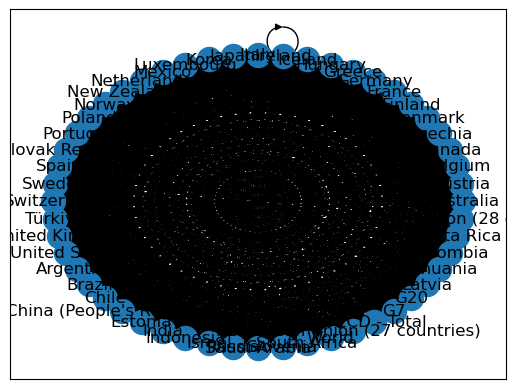

In [20]:
nx.draw_networkx(G, pos=nx.circular_layout(G))
plt.show()

In [25]:
viz = nxa.draw_networkx(G, pos=nx.circular_layout(G))

viz.interactive()

alt.LayerChart(...)

In [21]:
nt = Network('500px', '500px',notebook=True)
nt.from_nx(G)
nt.show('G.html')

G.html


AttributeError: 'NoneType' object has no attribute 'render'

In [22]:

import nx_altair as nxa

ModuleNotFoundError: No module named 'nx_altair'

In [ ]:
 net.show_buttons(filter_=['physics'])

In [20]:
g

<class 'pyvis.network.Network'> |N|=3 |E|=0

In [ ]:
df['geometry'] = df['the_geom'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

In [ ]:
gdf.head()

In [ ]:
gdf.info()

In [ ]:
#my_geo_df=my_geo_df.set_crs(epsg=4326)

In [ ]:
print(gdf.crs)

In [ ]:
my_mod_geo_df=gdf.to_crs('EPSG:3857')

In [ ]:
my_mod_geo_df.crs

In [ ]:
ax=my_mod_geo_df.plot(figsize=(16,16),alpha=0.5, edgecolor="k",column='Borough',legend=True)
cx.add_basemap(ax,crs=my_mod_geo_df.crs,zoom=12,source=cx.providers.OpenStreetMap.Mapnik)

### References:
- https://geopandas.org/en/stable/gallery/plotting_basemap_background.html